In [31]:
import numpy as np
import scipy.spatial 
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
import collections
import math

In [32]:
np.random.seed(42)

In [33]:
#2D Data

In [34]:
n = 100 #data points

Y = np.random.randn(n)
X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))

Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2) )
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [35]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size = 0.2, random_state = 0)
train_data = X_train
test_data = X_test
train_data.insert(loc=2, column='L', value=Y_train)
test_data.insert(loc=2, column='L', value=Y_test)



In [37]:
def knn(newObservation, referenceData, k = 3):
  lst = []
  for i, row in referenceData.iterrows():
    dist = distance.euclidean(newObservation[0:-1], row[0:-1])
    lst.append(((dist, row[-1])))
  
  lst = sorted(lst, key = lambda dis_label: dis_label[0])
  new_lst = []
  for item in lst:
    new_lst.append(item[1])
 
  dic = Counter(new_lst[0:k])
  #print(dic)
  max_count = 0
  max_key = None
  for key in dic:
    if dic[key] > max_count:
      max_count = dic[key]
      max_key = key
  #print(max_key)
  return max_key



In [38]:
pred_results = []
correct_answers = 0
count = 0
for index, test in test_data.iterrows():
  output = knn(test, train_data)
  pred_results.append(output)
  if output == test[2]:
    correct_answers += 1
print("Accuracy of the predicitions on the test dataset is {0}".format(correct_answers/len(test_data)))

Accuracy of the predicitions on the test dataset is 0.85


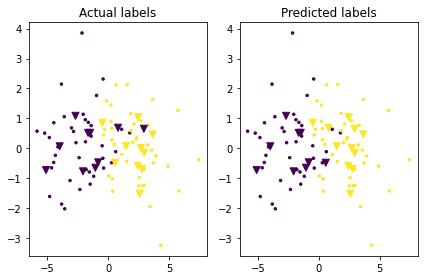

In [39]:

plt.subplot(1, 2, 1)
plt.scatter(train_data.iloc[:,0],train_data.iloc[:,1], s=25, c=train_data.iloc[:, 2], marker=".")
plt.scatter(test_data.iloc[:,0], test_data.iloc[:,1], s=50, c=test_data.iloc[:, 2], marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(train_data.iloc[:,0],train_data.iloc[:,1], s=25, c=train_data.iloc[:, 2], marker=".")
plt.scatter(test_data.iloc[:,0], test_data.iloc[:,1], s=50, c=pred_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

In [25]:
#3D Data

In [26]:
n = 1000 #data points

Y = np.random.randn(n)
X1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
X2 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
X3 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
X4 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
X = np.concatenate((X1, X2, X3, X4), axis=0)

Y1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
Y2 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Y3 = np.random.normal(loc=3.0, scale=1.0, size = int(n/4))
Y4 = np.random.normal(loc=5.0, scale=3.0, size = int(n/4))
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)

Z1 = np.random.normal(loc=-1.0, scale = 1.0, size = int(n/4))
Z2 = np.random.normal(loc=1.0, scale=1.0, size = int(n/4))
Z3 = np.random.normal(loc=4.0, scale= 1.0, size = int(n/4))
Z4 = np.random.normal(loc=-3, scale= 1.0, size = int(n/4))
Z = np.concatenate((Z1, Z2, Z3, Z4), axis = 0)


In [27]:
l1 = [0]*int(n/4)
l2 = [1]*int(n/4)
l3 = [2] * int(n/4)
l4 = [3] * int(n/4)
labels = l1+l2+l3 +l4
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [28]:
dt = pd.DataFrame({'X':X, 'Y':Y, 'Z': Z}, columns=['X', 'Y', 'Z'])
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size = 0.2, random_state = 0)
train_data = X_train
test_data = X_test
train_data.insert(loc=3, column='L', value=Y_train)
test_data.insert(loc=3, column='L', value=Y_test)



In [29]:
pred_results = []
correct_answers = 0
for index, test in test_data.iterrows():
  output = knn(test, train_data, 3)
  pred_results.append(output)
  if output == test["L"]:
    correct_answers += 1
print("Accuracy of the predicitions on the test dataset is {0}".format(correct_answers/len(test_data)))

Accuracy of the predicitions on the test dataset is 0.895


In [ ]:
train_data

,X,Y,Z,L
77,1.922255,-0.600217,-1.739793,3
71,1.132735,-1.435862,4.848767,2
92,3.504987,-0.589365,-1.335560,3
91,2.885264,-0.493001,-2.239227,3
20,-2.208968,-0.889514,-1.738631,0
...,...,...,...,...
63,3.651391,-1.024388,4.329840,2
23,-4.401851,0.341152,-0.868542,0
72,3.686260,1.163164,4.030496,2
9,-3.074446,0.656554,0.686639,0


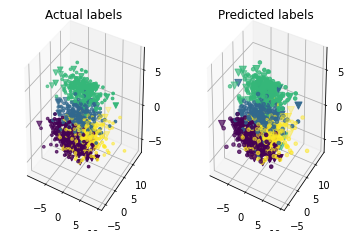

In [ ]:

ax = plt.subplot(1, 2, 1, projection='3d')
ax.scatter(train_data.iloc[:,0], train_data.iloc[:,1], train_data.iloc[:, 2], s= 30, c=train_data.iloc[:, 3], marker=".")
ax.scatter(test_data.iloc[:,0], test_data.iloc[:,1],  test_data.iloc[:, 2], s = 30, c=test_data.iloc[:, 3], marker="v")

plt.title('Actual labels')


ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.scatter(train_data.iloc[:,0],train_data.iloc[:,1], train_data.iloc[:, 2], s = 50, c=train_data.iloc[:, 3], marker=".")
ax2.scatter(test_data.iloc[:,0], test_data.iloc[:,1], test_data.iloc[:, 2], s = 50, c=pred_results, marker="v")
plt.title('Predicted labels')
plt.show()